In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [8]:
X = df.drop('Class', axis=1)
y = df.Class

In [9]:
X = scalar.fit_transform(X)

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.svm import SVC




In [12]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [13]:
model_svc.score(X_train,y_train)


0.9996752178015756

In [14]:

model_svc.score(X_test,y_test)



0.999385555282469

In [15]:
y_predict = model_svc.predict(X_test)

In [16]:
from sklearn.metrics import classification_report , confusion_matrix

In [17]:
import numpy as np

In [18]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,55,32
is Normal,3,56872


In [19]:
import seaborn as sns

<Axes: >

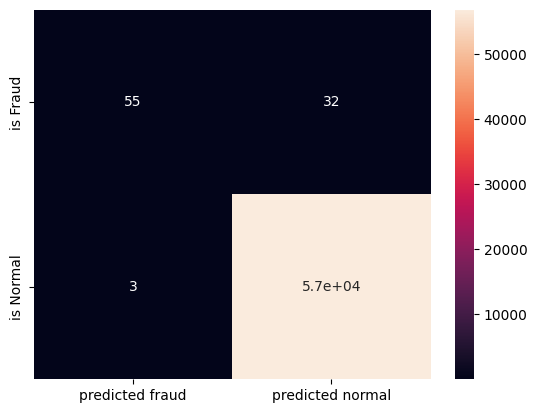

In [20]:
sns.heatmap(confusion, annot=True)

In [21]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.95      0.63      0.76        87

    accuracy                           1.00     56962
   macro avg       0.97      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

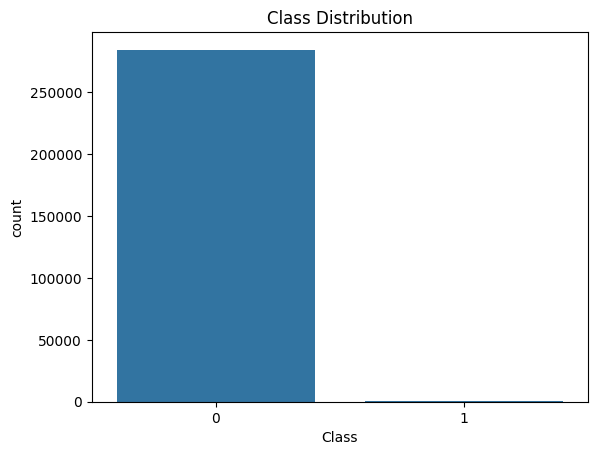

In [1]:
# # -*- coding: utf-8 -*-
# """Credit_card.ipynb

# Automatically generated by Colab.

# Original file is located at
#     https://colab.research.google.com/drive/14auKYJY5yLO7V4f-SLuc7UKVXGBdfdOC
# """

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Split the dataset into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the features using StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the models
models = [
    ('SVC', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Logistic Regression', LogisticRegression())
]



In [2]:
# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'ROC AUC: {roc_auc_score(y_test, y_pred):.3f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print('------------------------')



Model: SVC
Accuracy: 0.999
ROC AUC: 0.816
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.95      0.63      0.76        87

    accuracy                           1.00     56962
   macro avg       0.97      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56872     3]
 [   32    55]]
------------------------
Model: Random Forest
Accuracy: 1.000
ROC AUC: 0.885
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.77      0.84        87

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56870     5]
 [   20    67]]
------------------------
Model: Logistic Regression
Accuracy: 0.999
ROC AUC: 0.782


Model: SVC
Cross-Validation ROC AUC: 0.927 (+/- 0.016)
------------------------
Model: Random Forest
Cross-Validation ROC AUC: 0.895 (+/- 0.089)
------------------------
Model: Logistic Regression
Cross-Validation ROC AUC: 0.971 (+/- 0.013)
------------------------


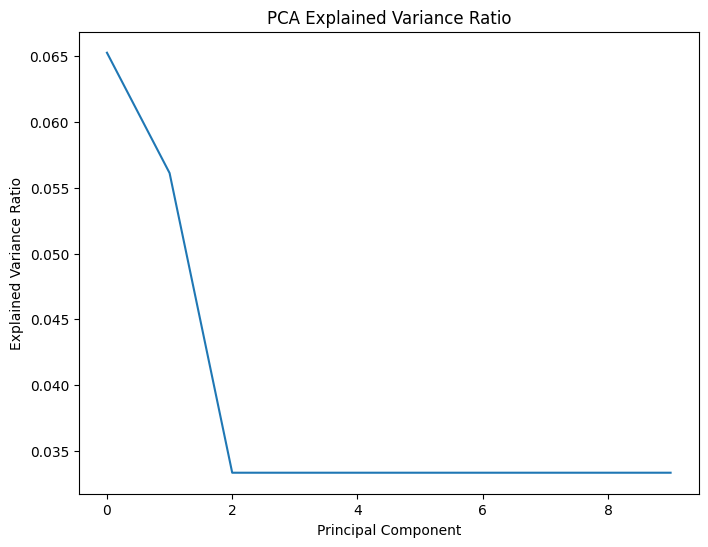

PCA Model Accuracy: 1.000
PCA Model ROC AUC: 0.900
PCA Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.97      0.80      0.88       492

    accuracy                           1.00    284807
   macro avg       0.99      0.90      0.94    284807
weighted avg       1.00      1.00      1.00    284807

PCA Model Confusion Matrix:
[[284303     12]
 [    98    394]]


In [4]:
# Perform cross-validation for each model
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    print(f'Model: {name}')
    print(f'Cross-Validation ROC AUC: {scores.mean():.3f} (+/- {scores.std():.3f})')
    print('------------------------')

# Apply PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()

# Train and evaluate a model on the PCA-transformed dataset
model_pca = SVC()
model_pca.fit(X_pca, y)
y_pred_pca = model_pca.predict(X_pca)
print(f'PCA Model Accuracy: {accuracy_score(y, y_pred_pca):.3f}')
print(f'PCA Model ROC AUC: {roc_auc_score(y, y_pred_pca):.3f}')
print(f'PCA Model Classification Report:\n{classification_report(y, y_pred_pca)}')
print(f'PCA Model Confusion Matrix:\n{confusion_matrix(y, y_pred_pca)}')